# How to reproduce (and play) with `neos`:

We first need to install a special branch of `pyhf`:

In [1]:
#%pip install git+http://github.com/scikit-hep/pyhf.git@make_difffable_model_ctor

Start with a couple of imports:

In [2]:
from jax.example_libraries import stax  # neural network library for JAX
from jax.random import PRNGKey  # random number generator
import jax.numpy as jnp  # JAX's numpy
import neos  # :)

`neos` experiments have been designed to run through a flexible `Pipeline` class, which will compose the necessary ingredients to train differentiable analyses end-to-end.

We have other examples in the works, but for now, we have wrapped up our current experiments in a module called `nn_observable`:

In [3]:
from neos.experiments.nn_observable import (
    nn_summary_stat,  # create a summary statistic from a neural network
    make_model,  # use the summary statistic to make a HistFactory style model
    generate_data,  # generates gaussian blobs to feed into the nn
    first_epoch,  # special plotting callback for the first epoch
    last_epoch,  # special plotting callback for the last epoch
    per_epoch,  # generic plotting callback for each epoch
    plot_setup,  # inital setup for the plotting
)

Each of these functions are pretty lightweight (with the exception of the plotting) -- if you want to get experimental and write your own pipeline, you'll find the code for those functions as a good starting point!

Now we'll jump into training! First, we set up a neural network (for regression) and a random state:

In [24]:
rng_state = 0  # random state

# feel free to modify :)
init_random_params, nn = stax.serial(
    stax.Dense(1024),
    stax.Relu,
    stax.Dense(1024),
    stax.Relu,
    stax.Dense(1),
    stax.Sigmoid,
)

_, init_pars = init_random_params(PRNGKey(rng_state), (-1, 2))

From there, we compose our pipeline with the relevant ingredients. I'll point out things you can play with immediately:

In [25]:
a = generate_data(rng=rng_state, num_points=10000)

In [27]:
a[0].shape

(10000, 2)

In [5]:
p = neos.Pipeline(
    data=generate_data(rng=rng_state, num_points=10000),  # total number of points
    yield_kwargs=dict(
        bandwidth=1e-1,  # bandwidth of the KDE (lower = more like a real histogram)
        bins=jnp.linspace(0, 1, 5),  # binning of the summary stat (over [0,1])
    ),
    nn=nn,  # the nn we defined above
    loss=lambda x: x[
        "CLs"  # our chosen loss metric!
    ],  # you can compose your own loss from a dict of metrics (see p.possible_metrics)
    num_epochs=5,  # number of epochs
    batch_size=2000,  # number of points per batch
    plot_name="demo_nn_observable.png",  # save the final plot!
    animate=True,  # make cool animations!
    animation_name="demo_nn_observable.gif",  # save them!
    random_state=rng_state,
    yields_from_pars=nn_summary_stat,
    model_from_yields=make_model,
    init_pars=init_pars,
    first_epoch_callback=first_epoch,
    last_epoch_callback=last_epoch,
    per_epoch_callback=per_epoch,
    plot_setup=plot_setup,
)

In [6]:
print(p.possible_metrics)

('CLs', 'mu_uncert', '1-pull_width**2', 'gaussianity')


Then we run! Each epoch takes around 15s on my local CPU, so expect something similar :)

You'll see some cool plots and animations, so it's worth it ;)

epoch 4/5: 4 batches
batch 4/4 took 4.8739s.

batch loss: 9.36e-06
metrics evaluated on test set:
yields:
  s = [1.84, 2.31, 5.04, 10.8]
  b = [90.3, 6.25, 3, 0.4]
  bup = [72.4, 13.1, 9.3, 5.15]
  bdown = [72, 14.5, 9.85, 3.75]
CLs = 1.05e-06
mu_uncert = 0.0795
pull_width = 0.906
1-pull_width**2 = 0.00877
pull = -0.00898
loss = 1.05e-06



(<matplotlib.animation.ArtistAnimation at 0x7ff8445a24c0>,
 {'CLs': [DeviceArray(2.35287632e-05, dtype=float64),
   DeviceArray(1.70566834e-06, dtype=float64),
   DeviceArray(1.11617354e-06, dtype=float64),
   DeviceArray(1.08438735e-06, dtype=float64),
   DeviceArray(1.97689571e-06, dtype=float64),
   DeviceArray(3.39126491e-06, dtype=float64),
   DeviceArray(3.25749298e-06, dtype=float64),
   DeviceArray(3.22669855e-06, dtype=float64),
   DeviceArray(3.14261578e-06, dtype=float64),
   DeviceArray(3.12066055e-06, dtype=float64),
   DeviceArray(2.90500077e-06, dtype=float64),
   DeviceArray(2.84339593e-06, dtype=float64),
   DeviceArray(2.31737151e-06, dtype=float64),
   DeviceArray(1.39411512e-06, dtype=float64),
   DeviceArray(1.07047366e-06, dtype=float64),
   DeviceArray(9.87367532e-07, dtype=float64),
   DeviceArray(9.80170437e-07, dtype=float64),
   DeviceArray(9.47542831e-07, dtype=float64),
   DeviceArray(1.07959525e-06, dtype=float64),
   DeviceArray(1.04620676e-06, dtype=floa

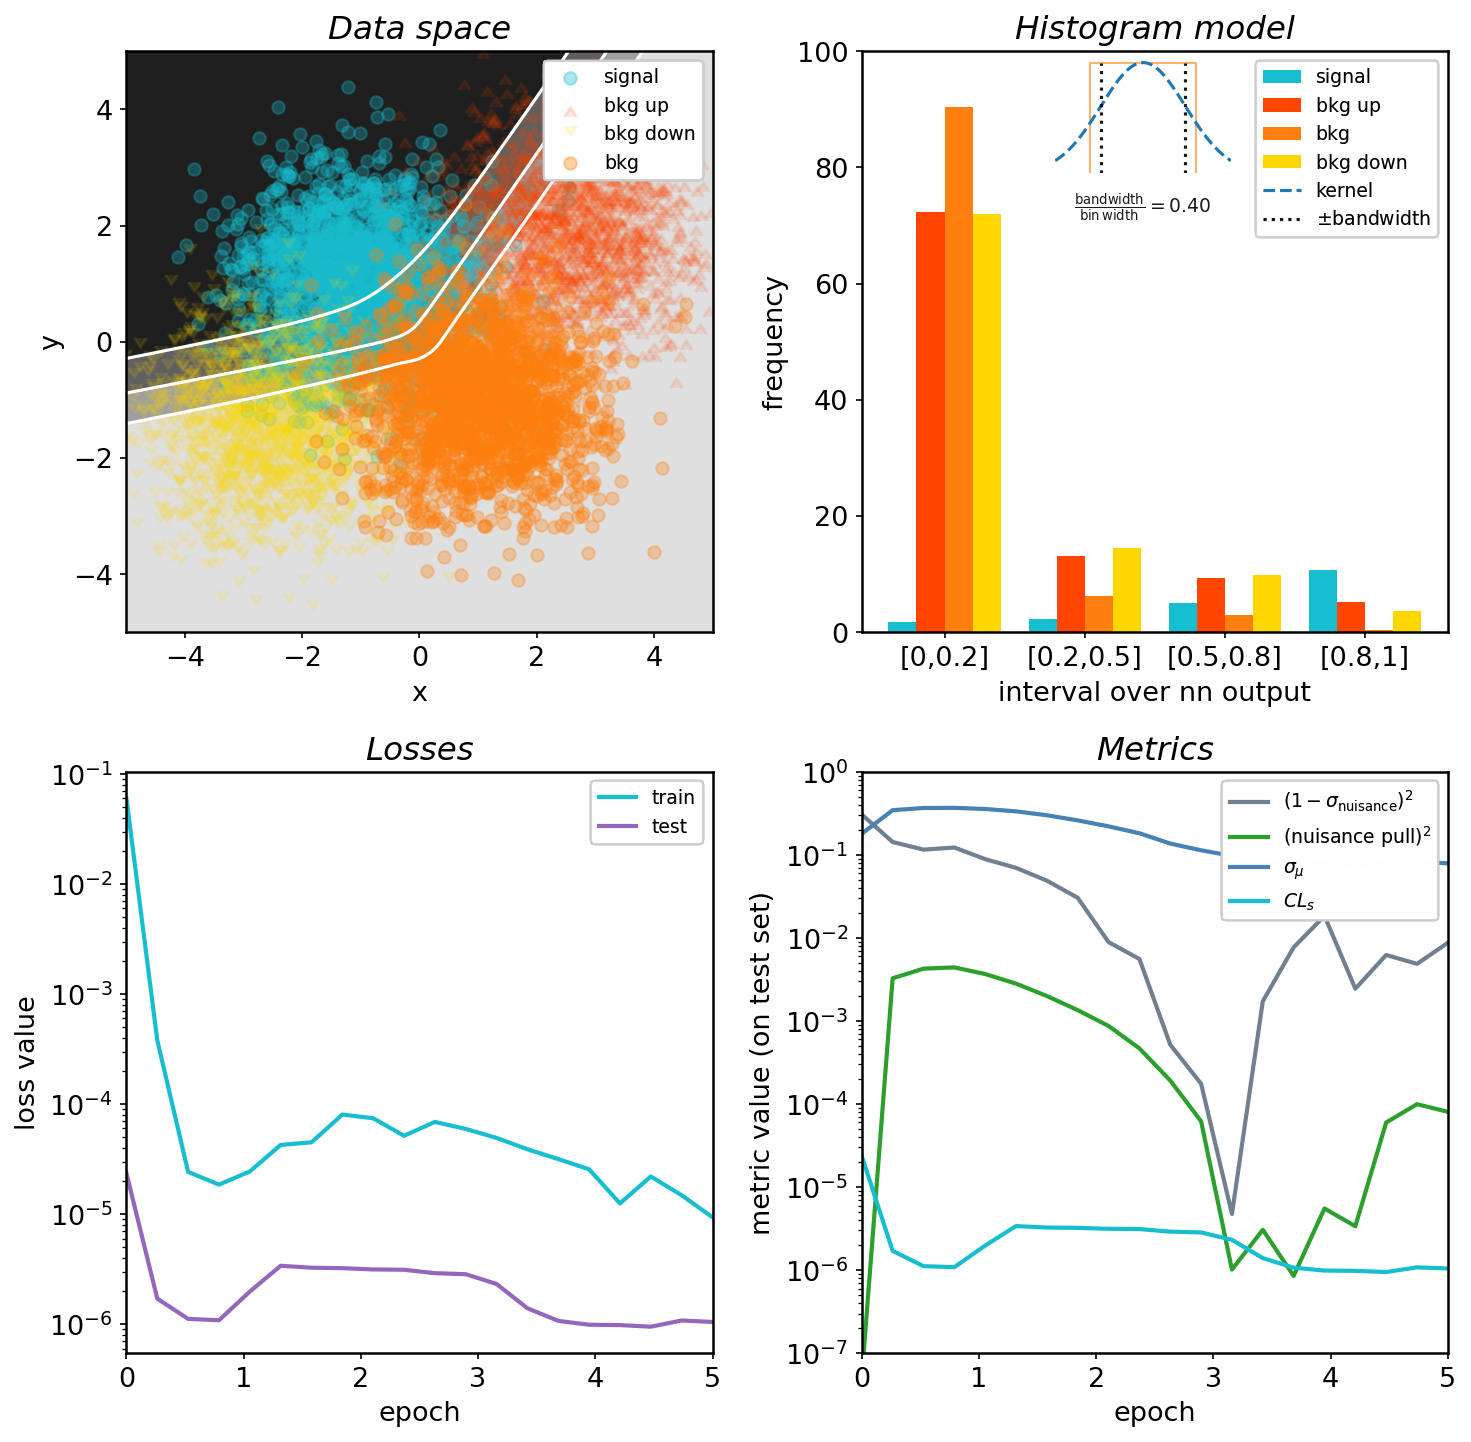

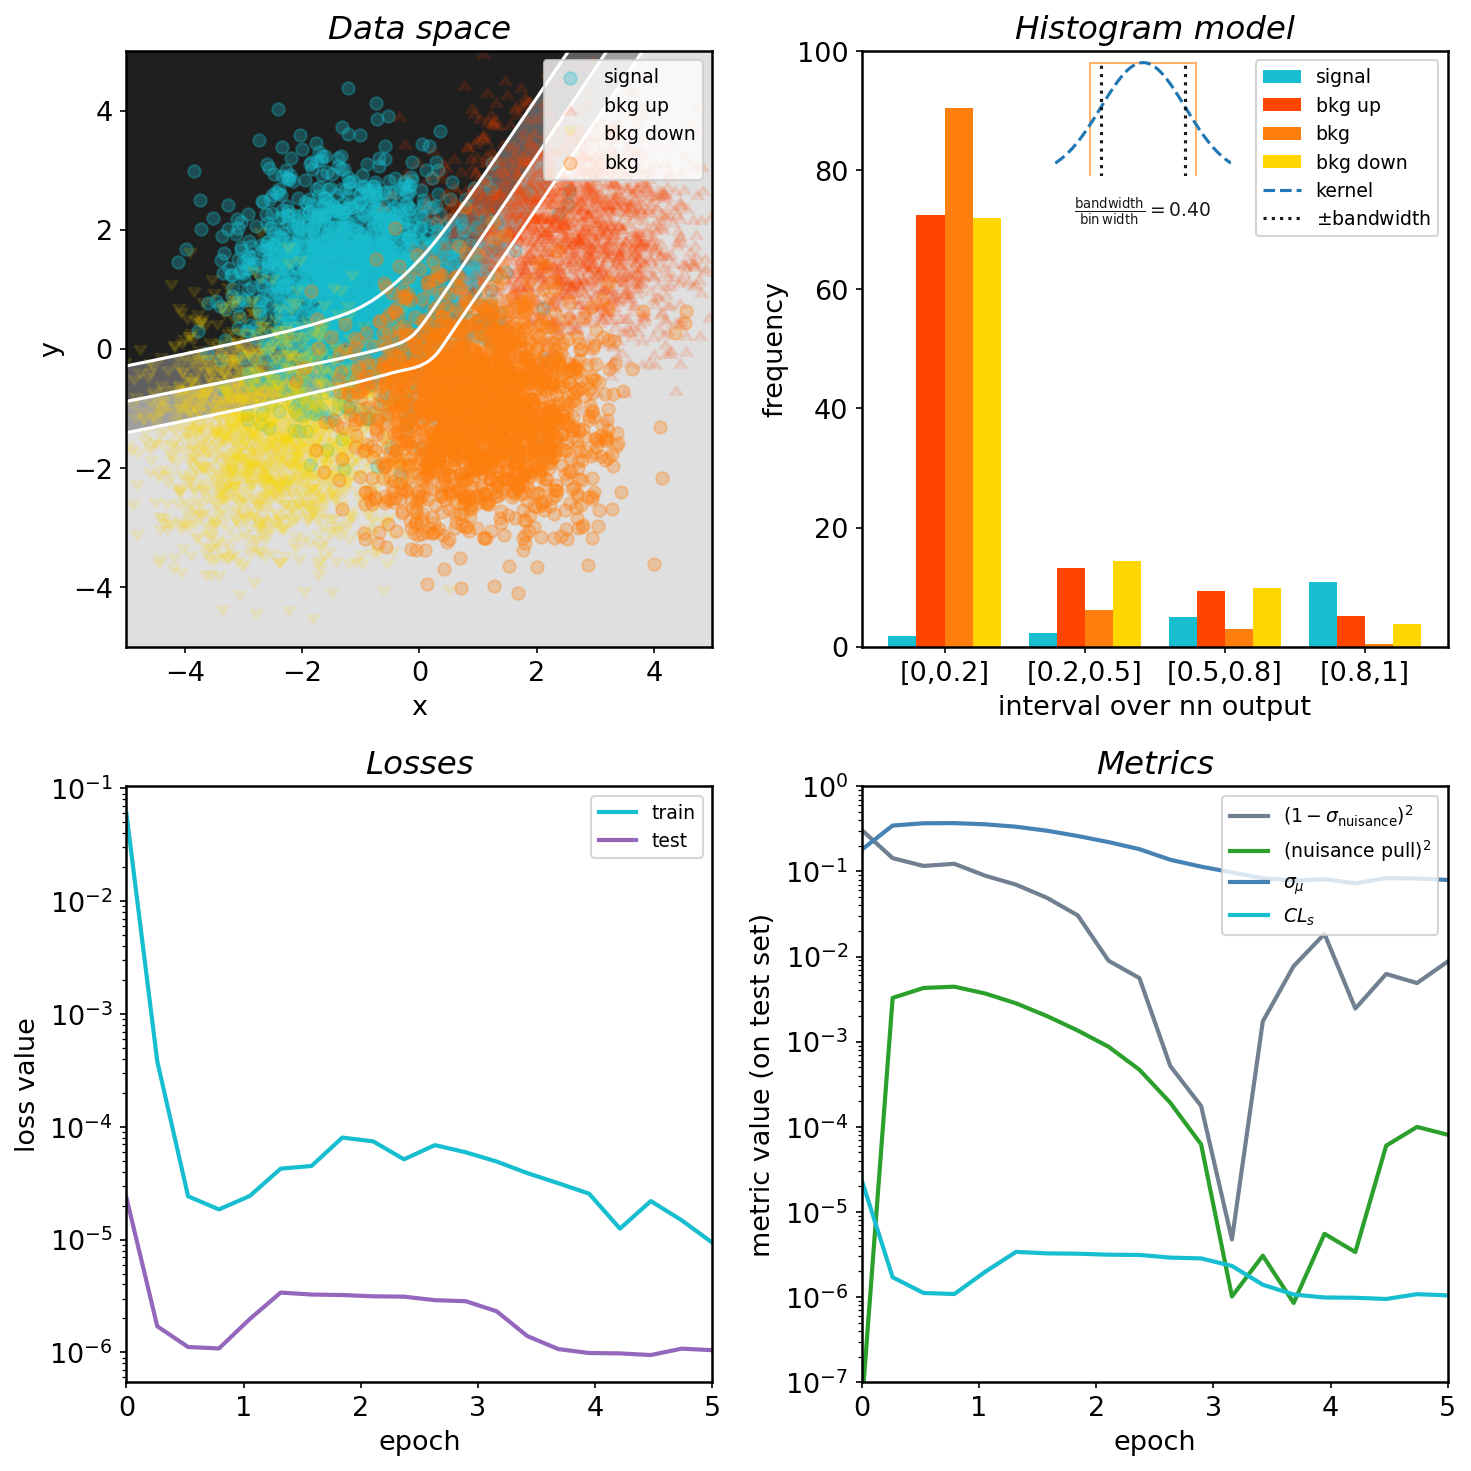

In [6]:
p.run()

--------

In [1]:
# Imports
from jax.example_libraries import stax  # neural network library for JAX
from jax.random import PRNGKey  # random number generator
import jax.numpy as jnp  # JAX's numpy
import neos  # :)

In [2]:
from neos.experiments.nn_observable import (
    nn_summary_stat,  # create a summary statistic from a neural network
    make_model,  # use the summary statistic to make a HistFactory style model
    generate_data,  # generates gaussian blobs to feed into the nn
    first_epoch,  # special plotting callback for the first epoch
    last_epoch,  # special plotting callback for the last epoch
    per_epoch,  # generic plotting callback for each epoch
    plot_setup,  # inital setup for the plotting
)

In [3]:
rng_state = 0  # random state

# feel free to modify :)
init_random_params, nn = stax.serial(
    stax.Dense(1024),
    stax.Relu,
    stax.Dense(1024),
    stax.Relu,
    stax.Dense(1),
    stax.Sigmoid,
)

_, init_pars = init_random_params(PRNGKey(rng_state), (-1, 2))

In [4]:
a = generate_data(rng=rng_state, num_points=10000)

In [5]:
a

(DeviceArray([[ 0.17191684,  2.004607  ],
              [-0.7241609 , -0.06080079],
              [-0.95184255, -1.3485811 ],
              ...,
              [-1.4053514 , -0.748549  ],
              [-2.0465403 ,  1.2205653 ],
              [-1.7040721 ,  1.652777  ]], dtype=float32),
 DeviceArray([[ 2.171917  ,  0.00460696],
              [ 1.2758391 , -2.0608008 ],
              [ 1.0481575 , -3.348581  ],
              ...,
              [ 0.59464866, -2.748549  ],
              [-0.04654014, -0.7794346 ],
              [ 0.29592788, -0.34722298]], dtype=float32),
 DeviceArray([[ 3.671917  ,  3.004607  ],
              [ 2.775839  ,  0.9391992 ],
              [ 2.5481575 , -0.34858108],
              ...,
              [ 2.0946486 ,  0.25145102],
              [ 1.4534599 ,  2.2205653 ],
              [ 1.7959279 ,  2.652777  ]], dtype=float32),
 DeviceArray([[-1.3280832 , -0.49539304],
              [-2.224161  , -2.5608008 ],
              [-2.4518425 , -3.848581  ],
          

------

# VH Analysis Neos setup

In [1]:
########-----------------Neos imports
from jax.example_libraries import stax  # neural network library for JAX
from jax.random import PRNGKey  # random number generator
import jax.numpy as jnp  # JAX's numpy
import neos  # :)

#Neos experiments
from neos.experiments.nn_observable import (
    nn_summary_stat,  # create a summary statistic from a neural network
    make_model,  # use the summary statistic to make a HistFactory style model
    generate_data,  # generates gaussian blobs to feed into the nn
    first_epoch,  # special plotting callback for the first epoch
    last_epoch,  # special plotting callback for the last epoch
    per_epoch,  # generic plotting callback for each epoch
    plot_setup,  # inital setup for the plotting
)

########-----------------Analysis imports
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pickle
import pandas as pd

#Plot settings
%matplotlib inline
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

#line thickness
import matplotlib as mpl

########-----------------Dataset parameters
lumis = {}
lumis['2016'] = 35.9
lumis['2017'] = 41.5
lumis['2018'] = 59.9

with open('../others/xsec.json') as f:
    xs = json.load(f)

with open('../others/pmap.json') as f:
    pmap = json.load(f)

systematics = ['nominal',
               'jet_triggerUp','jet_triggerDown',
               'btagWeightUp','btagWeightDown','btagEffStatUp','btagEffStatDown',
               'UESUp','UESDown','JESUp','JESDown','JERUp','JERDown',
              ]

mc = ['QCD','Wjets','Zjets','ttbar','singlet','VV','ggF','VBF','ZH','WH']


########-----------------To calculate significance
def significance(s,b):
    if b==0:
        return 0
    z_squared = 2.0*(s+b)*np.log(1.0+1.0*s/b) - 2.0*s
    return np.sqrt(z_squared)

########-----------------CUSTOMIZED PARAMETERS
year = str(2017)
working_dir = '/jennet_dir/hbb-prod-modes/vh-dec-2021/'
rng_state = 0  # random state


########-----------------Get data

## 1. Preprocessing

In [38]:
#QCD data points
qcd_data = uproot3.open("/data/merged_file048_Skim.root")

qcd_ddb1 = np.asarray(qcd_data['Events']['vh_fj_ddb1'].lazyarray())
qcd_ddc2 = np.asarray(qcd_data['Events']['vh_fj_ddc2'].lazyarray())

qcd = np.asarray([qcd_ddb1,qcd_ddc2]).transpose()
qcd_shift_1 = np.asarray([qcd_ddb1,qcd_ddc2+0.03]).transpose()
qcd_shift_2 = np.asarray([qcd_ddb1+0.05,qcd_ddc2]).transpose()

#Fake signal
mean = [0.55,0.12]
cov = [[0.006, 0],[0,0.0005]]
sig = np.random.multivariate_normal(mean, cov, 100000)

sig_ddb1 = sig[:,0]
sig_ddc2 = sig[:,1]

In [43]:
np.save('qcd.npy', qcd)
np.save('sig.npy', sig)
np.save('qcd_shift_1.npy', qcd_shift_1)
np.save('qcd_shift_2.npy', qcd_shift_2)

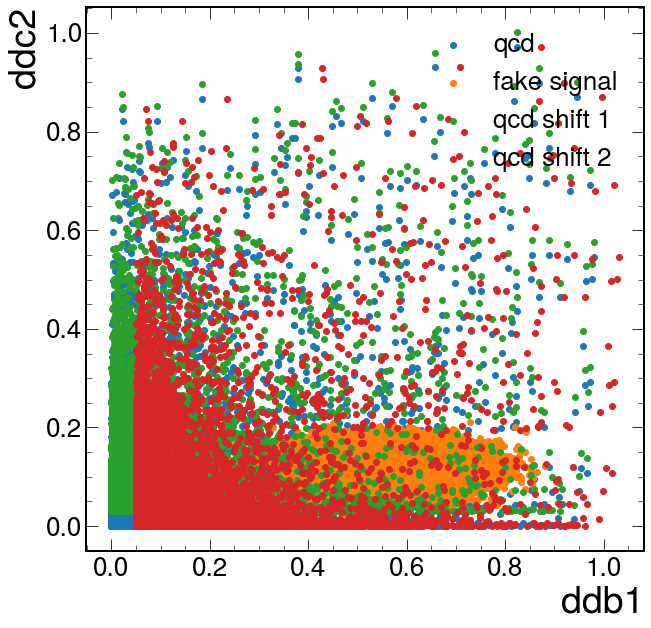

In [21]:
plt.scatter(qcd_ddb1, qcd_ddc2, label = 'qcd')
plt.scatter(sig_ddb1, sig_ddc2, label = 'fake signal')

plt.scatter(qcd_ddb1, qcd_ddc2+0.03, label = 'qcd shift 1')
plt.scatter(qcd_ddb1+0.05, qcd_ddc2, label = 'qcd shift 2')

plt.xlabel('ddb1')
plt.ylabel('ddc2')

plt.legend()
plt.show()

* Cross section
* Event weights
* 

## 2. Create custom pipeline

In [39]:
#Use simple neural net
init_random_params, nn = stax.serial(
    stax.Dense(1024),
    stax.Relu,
    stax.Dense(1024),
    stax.Relu,
    stax.Dense(1),
    stax.Sigmoid,
)

_, init_pars = init_random_params(PRNGKey(rng_state), (-1, 2))

In [40]:
p = neos.Pipeline(
    data= (sig, qcd, qcd_shift_1,qcd_shift_2),  # total number of points
    yield_kwargs=dict(
        bandwidth=1e-1,  # bandwidth of the KDE (lower = more like a real histogram)
        bins=jnp.linspace(0, 1, 5),  # binning of the summary stat (over [0,1])
    ),
    nn=nn,  # the nn we defined above
    loss=lambda x: x[
        "CLs"  # our chosen loss metric!
    ],  # you can compose your own loss from a dict of metrics (see p.possible_metrics)
    num_epochs=5,  # number of epochs
    batch_size=2000,  # number of points per batch
    plot_name="demo_nn_observable.png",  # save the final plot!
    animate=True,  # make cool animations!
    animation_name="demo_nn_observable.gif",  # save them!
    random_state=rng_state,
    yields_from_pars=nn_summary_stat,
    model_from_yields=make_model,
    init_pars=init_pars,
    first_epoch_callback=first_epoch,
    last_epoch_callback=last_epoch,
    per_epoch_callback=per_epoch,
    plot_setup=plot_setup,
)

epoch 0/5: 40 batches
batch 22/40 took 5.3049s.

batch loss: 2.21e-07
metrics evaluated on test set:
yields:
  s = [20, 0.047, 0, 0]
  b = [0.79, 1.82, 97.4, 0]
  bup = [0.805, 1.9, 97.3, 0]
  bdown = [0.935, 3.07, 96, 0]
CLs = 3.77e-09
mu_uncert = 0.0446
pull_width = 0.916
1-pull_width**2 = 0.00709
pull = 0.0495
loss = 3.77e-09

batch 23/40:


ValueError: RESOURCE_EXHAUSTED: Out of memory allocating 163840000 bytes.

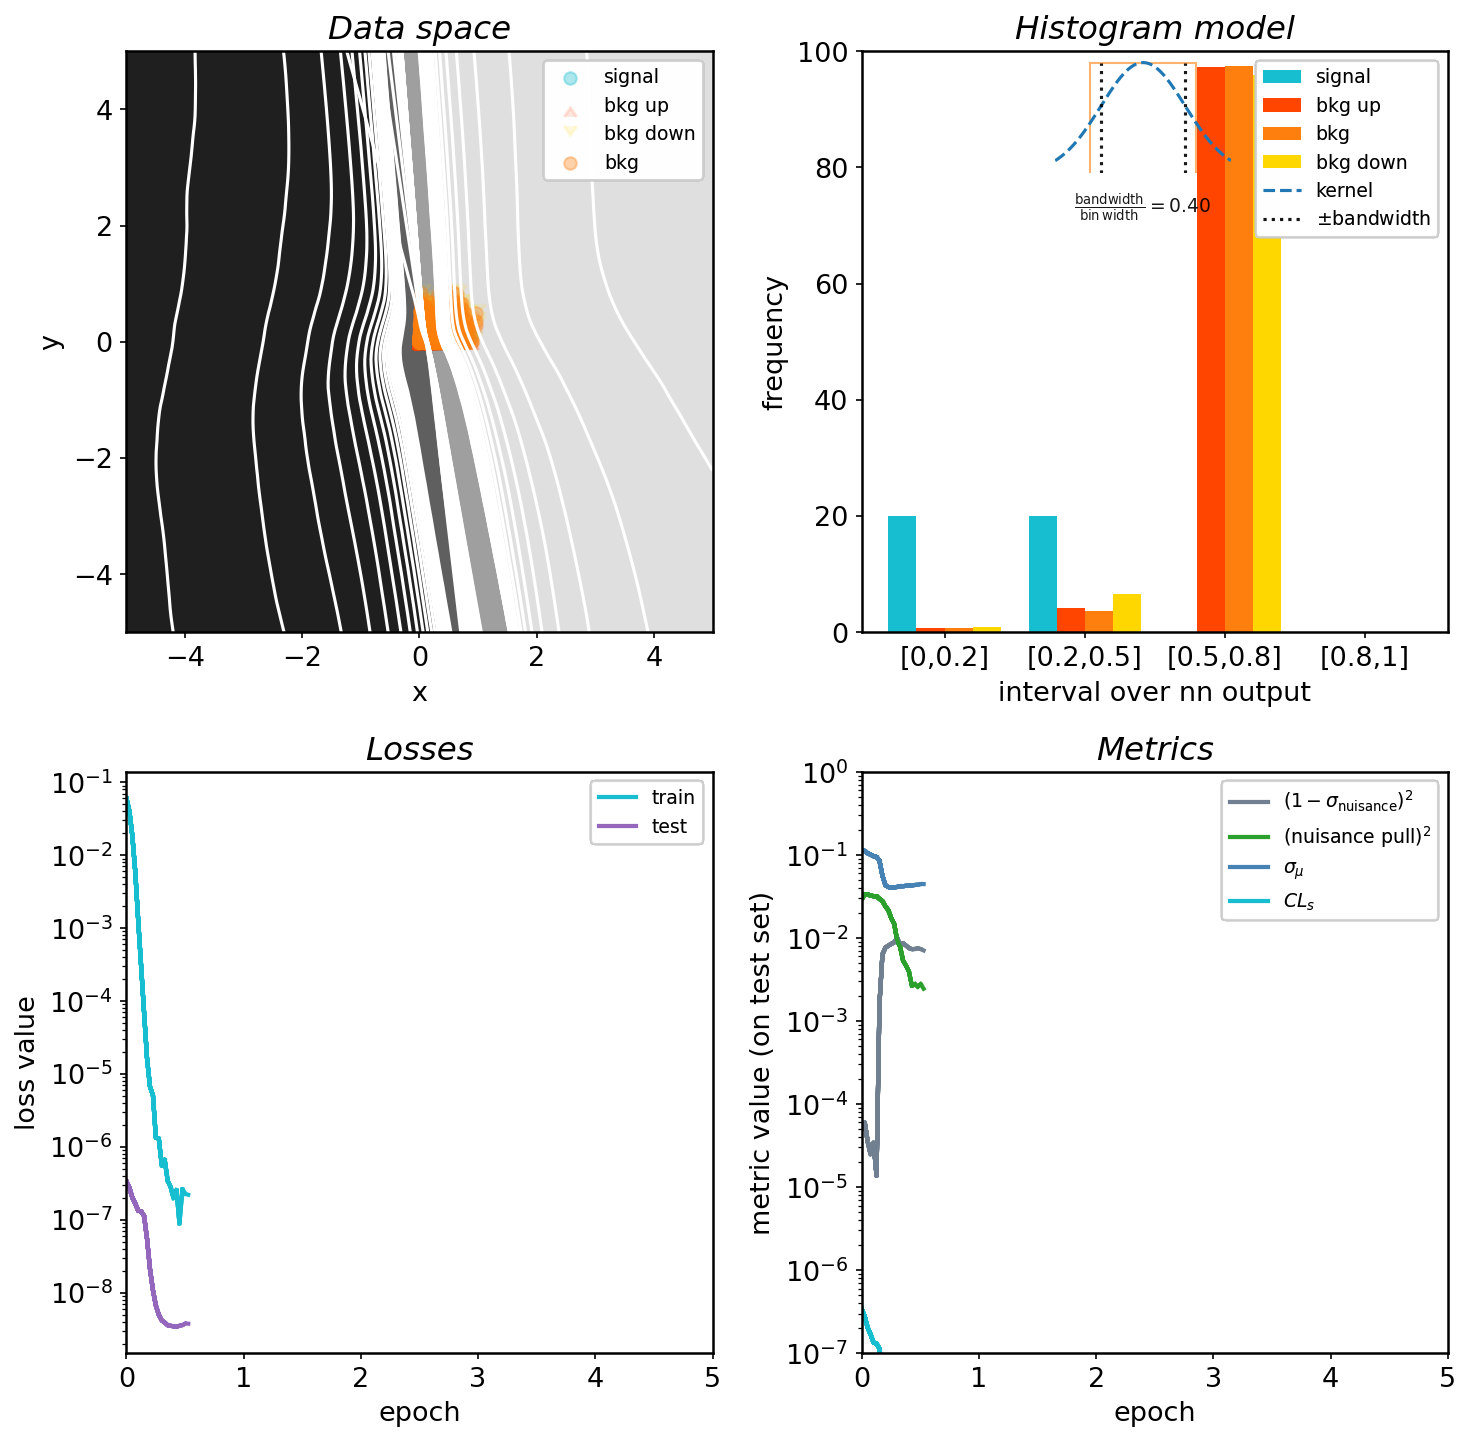

In [41]:
p.run()

### TODO:

- Generate data for pipeline:
    * For now using only QCD as backgrounds, ZH or WH data points as signals. 10000 data points each.

In [8]:
!ls /jennet_dir/hbb-prod-modes/vh-dec-2021/

2016		  make-hists-1mv-charm.py   outfiles
2017		  make-hists-1mv-charm.py~  outfiles-beforeXmas
2018		  make-hists-1mv-light.py   plot-vh.ipynb
README.md	  make-hists-1mv-light.py~  pmap.json
README.md~	  make-hists-1mv.py	    pmap_mc.json
boostedhiggs	  make-hists-1mv.py~	    shell
dask-report.html  make-hists-3mv-charm.py   submit-dask.py
draw_datafit.C	  make-hists-3mv-light.py   triggers.json
draw_datafit.C~   make-hists-3mv.py	    vh-scripts
infiles		  make-pkl.py		    xsec.json
jupyter.sh	  muon_triggers.json


In [ ]:
#Use simple neural net
init_random_params, nn = stax.serial(
    stax.Dense(1024),
    stax.Relu,
    stax.Dense(1024),
    stax.Relu,
    stax.Dense(1),
    stax.Sigmoid,
)

_, init_pars = init_random_params(PRNGKey(rng_state), (-1, 2))

## 2. Create custom pipeline

In [ ]:
p = neos.Pipeline(
    data=generate_data(rng=rng_state, num_points=10000),  # total number of points
    yield_kwargs=dict(
        bandwidth=1e-1,  # bandwidth of the KDE (lower = more like a real histogram)
        bins=jnp.linspace(0, 1, 5),  # binning of the summary stat (over [0,1])
    ),
    nn=nn,  # the nn we defined above
    loss=lambda x: x[
        "CLs"  # our chosen loss metric!
    ],  # you can compose your own loss from a dict of metrics (see p.possible_metrics)
    num_epochs=5,  # number of epochs
    batch_size=2000,  # number of points per batch
    plot_name="demo_nn_observable.png",  # save the final plot!
    animate=True,  # make cool animations!
    animation_name="demo_nn_observable.gif",  # save them!
    random_state=rng_state,
    yields_from_pars=nn_summary_stat,
    model_from_yields=make_model,
    init_pars=init_pars,
    first_epoch_callback=first_epoch,
    last_epoch_callback=last_epoch,
    per_epoch_callback=per_epoch,
    plot_setup=plot_setup,
)